<center><font size=6><b>Impact of JLab 2020 neutron data</b></font></center>

# Initializations

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import shelve, sys, copy
import logging, logzero
from logzero import logger
logzero.loglevel(logging.INFO)
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt

In [2]:
## Loading Gepard software 
## (* This is not provided publicly yet, ask if you want it *)
GEPARD_DIR = '/home/kkumer/gepard'
sys.path.append(GEPARD_DIR+'/pype')
import Model, Approach, Data, Fitter, utils, plots
from results import *
from abbrevs import *
from constants import *

In [3]:
## Database of all models and fits
db = shelve.open(GEPARD_DIR+'/pype/theories.db', flag='r')
th15 = db['KM15']

In [4]:
# Where stuff to be included in LaTeX goes
PAPER_DIR = '/home/kkumer/papers/neutron/'

In [5]:
matplotlib.rcParams['text.usetex'] = True  # Use LaTeX fonts on figs for publication quality (slower)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}\usepackage{amssymb}']  # needed for \mathfrak
#matplotlib.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
matplotlib.rc('font',**{'serif':['Computer Modern Roman']})

# Data used for fits

Following 290 points were used in previous work for a referent model `KM15`

In [6]:
npts = utils.describe_data(GLO15b)

npt x obs    collab  FTn    id  ref.        
---------------------------------------------
 6 x ALUI   HERMES  -1.0   68  arXiv:1203.6287 [hep-ex]
 4 x AUTI   HERMES  1.0    66  arXiv:0802.2499
 6 x BCA    HERMES  0.0    67  arXiv:1203.6287 [hep-ex]
 6 x BCA    HERMES  1.0    67  arXiv:1203.6287 [hep-ex]
10 x BSA    CLAS    -1     94  arXiv:1501.07052
 3 x BSA    CLAS    -1.0   81  arXiv:0812.2950
48 x BSDw   CLAS    -1     101 arXiv:1504.02009
15 x BSDw   HALLA   -1     117 arXiv:1504.05453
48 x BSSw   CLAS    0.0    102 arXiv:1504.02009
48 x BSSw   CLAS    1.0    102 arXiv:1504.02009
10 x BSSw   HALLA   0.0    116 arXiv:1504.05453
10 x BSSw   HALLA   1.0    116 arXiv:1504.05453
10 x BTSA   CLAS    0.0    96  arXiv:1501.07052
10 x BTSA   CLAS    1.0    96  arXiv:1501.07052
 4 x BTSA   HERMES  0.0    53  arXiv:1004.0177v1
 3 x TSA    CLAS    -1     54  arXiv:hep-ex/0605012
10 x TSA    CLAS    -1     95  arXiv:1501.07052
 4 x TSA    HERMES  -1.0   52  arXiv:1004.0177v1
 6 x X      ZEUS 

For most of the fits below we will restrict ourselves to just the following newer JLab data. First, the data that was already used before:

In [7]:
npts = utils.describe_data(GLO15new)

npt x obs    collab  FTn    id  ref.        
---------------------------------------------
10 x BSA    CLAS    -1     94  arXiv:1501.07052
48 x BSDw   CLAS    -1     101 arXiv:1504.02009
15 x BSDw   HALLA   -1     117 arXiv:1504.05453
48 x BSSw   CLAS    0.0    102 arXiv:1504.02009
48 x BSSw   CLAS    1.0    102 arXiv:1504.02009
10 x BSSw   HALLA   0.0    116 arXiv:1504.05453
10 x BSSw   HALLA   1.0    116 arXiv:1504.05453
10 x BTSA   CLAS    0.0    96  arXiv:1501.07052
10 x BTSA   CLAS    1.0    96  arXiv:1501.07052
10 x TSA    CLAS    -1     95  arXiv:1501.07052
---------------------------------------------
TOTAL = 219


Then, second, Hall A data from 2017 with variable beam energy:

In [8]:
npts = utils.describe_data(data[135]+data[136])

npt x obs    collab  FTn    id  ref.        
---------------------------------------------
18 x BSDw   HALLA   -1     135 arXiv:1703.09442
22 x BSSw   HALLA   0.0    136 arXiv:1703.09442
22 x BSSw   HALLA   1.0    136 arXiv:1703.09442
---------------------------------------------
TOTAL = 62


And, third and final, Hall A neutron DVCS data from 2020:

In [9]:
npts = utils.describe_data(data[140])

npt x obs    collab  FTn    id  ref.        
---------------------------------------------
 8 x BSSw   HALLA   0.0    140 doi:10.1038/s41567-019-0774-3
 8 x BSSw   HALLA   1.0    140 doi:10.1038/s41567-019-0774-3
---------------------------------------------
TOTAL = 16


These data sets are Fourier-transformed versions of the following original data. Going backwards, third, Hall A neutron DVCS data from 2020:

In [10]:
HA20_BSS_phi = data[139]

Second, Hall A proton data from 2017:

In [11]:
HA17_BSS_phi = data[129]+data[130]+data[131]+data[132]+data[133]+data[134]
HA17_BSS_phiR = utils.select(HA17_BSS_phi, ['Q2 > 1.7'])
HA17_BSD_phi = data[124]+data[125]+data[126]+data[127]+data[128]

And, first, Hall A proton data from 2015:

In [12]:
HA15_BSS_phi = data[107]+data[108]
HA15_BSD_phi = data[109]+data[110]+data[111]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc82d173e80>]],
      dtype=object)

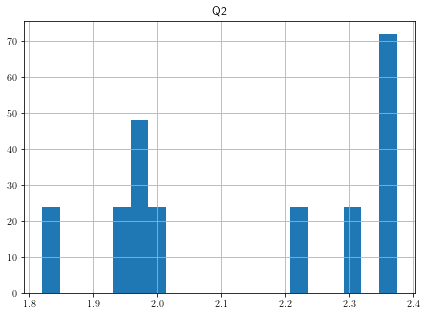

In [13]:
HA15_BSS_phi.df()[['Q2']].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc82b00c160>]],
      dtype=object)

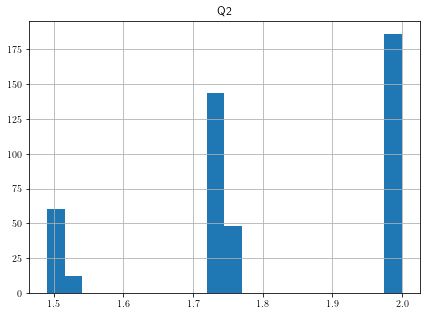

In [14]:
HA17_BSS_phi.df()[['Q2']].hist(bins=20)

For some fits, we experimented with excluding the lowest-Q2 data of this set (Q2<1.7),
but not much was gained in terms of quality of description of other data,
so in the end we kept everything. (Only exception is Hall A 2017 BSD data which creates funny tensions, so is kept only in the phi-space chi-squares table in the paper, but is not included in actual Fourier-space fit.)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc82afc0490>]],
      dtype=object)

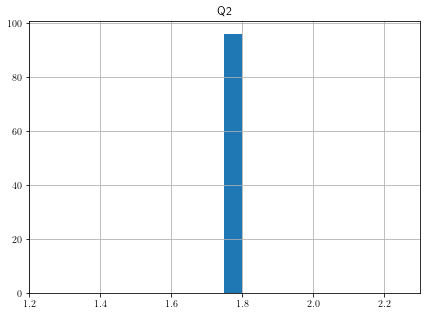

In [15]:
HA20_BSS_phi.df()[['Q2']].hist(bins=20)

# New fits

Actual fits take hours or days (example Python scripts are available in subdir `ex`) and resulting models are saved in model database.

Final best models are:

**Non-flavour-separated** (proton data only):


In [16]:
th20 = db['KM20']  # model, KM-like
thNN20 = db['NN20']  # NNet (without DR constraints)
thNNDR20 = db['NNDR20']  # NNet+DR

**Flavour-separated** (proton+neutron data):

In [17]:
thf20 = db['fKM20']  # model, KM-like
thfNN20 = db['fNN20']  # NNet (without DR constraints)
thfNNDR20= db['fNNDR20']  # NNet+DR

In [18]:
db.close()

Architectures:

In [19]:
for th in [thNN20, thNNDR20, thfNN20, thfNNDR20]:
    print('{:>8s} --> {}'.format(th.name, th.m.architecture))

    NN20 --> [2, 13, 6]
  NNDR20 --> [2, 13, 6]
   fNN20 --> [2, 11, 17, 18]
 fNNDR20 --> [2, 11, 17, 18]


Additionally, subtraction constant part of the net has single hidden layer with 3 neurons fo `NNDR20` (architecture `[1, 3, 1]`, while `fNNDR20` has separate net parts for u quark `[1, 5, 1]`) and d quark (`[1, 4, 1]`). Note that actual number of output neurons of main CFF net is not 6 or 18, as stated above because (1) Re(CFF) output nodes which are obtained by dispersion relations are ignored, and (2) non-flavored output nodes which have to be present for the code to run correctly are also ignored. Thus correct architectures of `NNDR20`, `fNN20` and `fNNDR20` are `[2, 13, 4]`, `[2, 11, 17, 12]` and `[2, 11, 17, 8]`.

# $\chi^2$'s and analysis

## Non-flavour-separated models

For non-flavor-separated models, there is no advantage to results obtained with reduced J15 dataset, so we will use full J15 for everything (possible exception to this: we might make a cut in Q2).

So we are left with two decisions: (1) To use H17 BSSw1 or not? (2) to make a cut in Q2 or not?

Run at another machine:

```utils.listchis([thc, thNN30, thNN31], nsets=9, out='pulls')```

with result:

```
                         thc     nfNN-S0    nfNN-S
                       ------    ------    ------
CLAS      BSA    :       1.64      0.52      0.96   (np =  9)
CLAS      TSA    :       0.98     -0.39     -0.53   (np =  9)
CLAS      BTSA   :       1.40      2.55      1.91   (np = 18)
CLAS      BSDw_s1:      -1.39     -2.21     -1.34   (np = 48)
CLAS      BSSw_c0:       0.72      0.41      1.09   (np = 48)
CLAS      BSSw_c1:       7.40      4.39      5.34   (np = 48)
HallA 15  BSDw_s1:      -2.28      1.36      1.20   (np = 15)
HallA 15  BSSw_c0:       5.02      7.34      8.85   (np = 10)
HallA 15  BSSw_c1:       1.94     -1.27      3.36   (np = 10)
HallA 17  BSSw_c0:      -4.00     -2.97     -1.22   (np = 22)
HallA 17  BSSw_c1:      -4.21     -9.80     -4.65   (np = 22)
```

Run at another machine:

```utils.listchis([thNNDR28, thNNDR32], nsets=9, out='chis')```

with result

```
                      nfNNDR-S0   nfNNDR-S
                       ------    ------
CLAS      BSA    :       2.04      1.94   (np =  9)
CLAS      TSA    :       0.52      0.76   (np =  9)
CLAS      BTSA   :       3.01      2.98   (np = 18)
CLAS      BSDw_s1:       0.76      0.76   (np = 48)
CLAS      BSSw_c0:       0.19      0.28   (np = 48)
CLAS      BSSw_c1:       1.39      1.92   (np = 48)
HallA 15  BSDw_s1:       0.67      0.62   (np = 15)
HallA 15  BSSw_c0:       3.98      5.30   (np = 10)
HallA 15  BSSw_c1:       2.19      2.99   (np = 10)
HallA 17  BSSw_c0:       3.61      2.70   (np = 22)
HallA 17  BSSw_c1:       7.69      4.74   (np = 22)
                       ------    ------
===       TOTAL  :       1.97      1.84   (np =259)
```

Run at another machine:

```utils.listchis([thNNDR28, thNNDR32], nsets=9, out='pulls')```

with result

```
                      nfNNDR-S0   nfNNDR-S
                       ------    ------
CLAS      BSA    :       0.07     -0.36   (np =  9)
CLAS      TSA    :       0.73      0.53   (np =  9)
CLAS      BTSA   :       5.19      5.01   (np = 18)
CLAS      BSDw_s1:      -3.36     -3.43   (np = 48)
CLAS      BSSw_c0:       1.69      2.73   (np = 48)
CLAS      BSSw_c1:       7.00      8.52   (np = 48)
HallA 15  BSDw_s1:       1.82      1.51   (np = 15)
HallA 15  BSSw_c0:       4.78      6.06   (np = 10)
HallA 15  BSSw_c1:      -1.40      3.06   (np = 10)
HallA 17  BSSw_c0:      -5.89     -4.12   (np = 22)
HallA 17  BSSw_c1:      -9.54     -4.54   (np = 22)

```

These tables look inconclusive, but augumented by analysis of $\chi^2$ values for original $\phi$-space data, they lead to conclusion that there is no reason one should not take all data for fits, which is what we finally do.

## Flavour-separated models

For flavour-separated models we have additional decision to make: (3) Should we use reduced J15 dataset so that neutron data is not overwhelmed by proton.

Comparing 

Q3: Reduced dataset or not.
On another machine:

```
utils.listchis([thNNDRf30, thNNDRf33], nsets=11, out='chis')
```

Result:

```
                       full       half
                       ------    ------
CLAS      BSA    :       2.45      2.70   (np =  9)
CLAS      TSA    :       2.11      3.26   (np =  9)
CLAS      BTSA   :       2.17      1.92   (np = 18)
CLAS      BSDw_s1:       1.23      1.37   (np = 48)
CLAS      BSSw_c0:       0.16      0.20   (np = 48)
CLAS      BSSw_c1:       1.51      1.62   (np = 48)
HallA 15  BSDw_s1:       0.61      0.84   (np = 15)
HallA 15  BSSw_c0:       3.55      6.31   (np = 10)
HallA 15  BSSw_c1:       2.26      3.94   (np = 10)
HallA 17  BSSw_c0:       4.86      3.16   (np = 22)
HallA 17  BSSw_c1:       5.41      4.26   (np = 22)
HallA 20  nBSSw_c0:       1.53      1.84   (np =  8)
HallA 20  nBSSw_c1:       0.42      0.42   (np =  8)
                       ------    ------
===       TOTAL  :       1.92      1.96   (np =275)
```

Q3: Reduced dataset or not.
On another machine:

```
utils.listchis([thNNDRf30, thNNDRf33], nsets=11, out='pulls')
```

Result:

```
                       full       half
                       ------    ------
CLAS      BSA    :      -1.56     -2.49   (np =  9)
CLAS      TSA    :       2.64      2.00   (np =  9)
CLAS      BTSA   :       3.93      2.63   (np = 18)
CLAS      BSDw_s1:      -5.46     -5.98   (np = 48)
CLAS      BSSw_c0:      -0.38     -0.07   (np = 48)
CLAS      BSSw_c1:       7.25      7.52   (np = 48)
HallA 15  BSDw_s1:      -1.59     -2.29   (np = 15)
HallA 15  BSSw_c0:       3.10      5.86   (np = 10)
HallA 15  BSSw_c1:       2.72      4.81   (np = 10)
HallA 17  BSSw_c0:      -8.06     -5.45   (np = 22)
HallA 17  BSSw_c1:      -5.61     -3.50   (np = 22)
HallA 20  nBSSw_c0:      -0.56      0.41   (np =  8)
HallA 20  nBSSw_c1:      -0.25     -0.00   (np =  8)
```

So, reducing the amount of proton data doesn't significantly help neutron data fits.

Plots p+n (using fits to half J15) show no difference between fits with and without H17 BSSw1.

Thus, also after including neutron data and using flavored models, we will work with maximal available datasets.

## Final $\chi^2$'s for the paper

In [20]:
def pred(th, pt):
    """Attach a prediction of th to pt as attribute"""
    if not hasattr(pt, 'preds'):
        pt.preds = {}
    if 'nnet' not in th.m.parameters:
        # we have a normal model
        pt.preds[th.name] = th.predict(pt)
    else:
        # we have NN model
        p = []
        for k in range(len(th.m.nets)):
            th.m.parameters['nnet'] = k
            p.append(th.predict(pt))
        th.m.parameters['nnet'] = 'ALL'
        pt.preds[th.name] = p

Calculation of predictions and chi-squares for all models and all datapoints take a lot of CPU time (measured in weeks) so this was done outside of this notebook and stored in a dedicated database:

In [21]:
dbfit = shelve.open(GEPARD_DIR+'/pype/fit20.db', flag='r')

In [22]:
# n-dep
C_BSA = dbfit['C_BSA']
C_TSA = dbfit['C_TSA']
C_BTSA = dbfit['C_BTSA']
C_BSS = dbfit['C_BSS']
C_BSD = dbfit['C_BSD']
HA15_BSS = dbfit['HA15_BSS']
HA15_BSD = dbfit['HA15_BSD']
HA17_BSS = dbfit['HA17_BSS']
HA17_BSD = dbfit['HA17_BSD']
HA20_BSS = dbfit['HA20_BSS']

# phi-dep
C_BSA_phi = dbfit['C_BSA_phi']
C_TSA_phi = dbfit['C_TSA_phi']
C_BTSA_phi = dbfit['C_BTSA_phi']
C_BSS_phi = dbfit['C_BSS_phi']
C_BSD_phi = dbfit['C_BSD_phi']
HA15_BSS_phi = dbfit['HA15_BSS_phi']
HA15_BSD_phi = dbfit['HA15_BSD_phi']
HA17_BSS_phi = dbfit['HA17_BSS_phi']
HA17_BSD_phi = dbfit['HA17_BSD_phi']
HA20_BSS_phi = dbfit['HA20_BSS_phi']

In [23]:
dbfit.close()

In [24]:
thkeys = ['KM20', 'NN20', 'NNDR20', 'fKM20', 'fNNDR20']

In [25]:
def chirow(dataset):
    "Return chisq/npt for all models for given dataset."
    chis = []
    for thkey in thkeys:
        chi = 0
        npts = 0
        try:
            for pt in dataset:
                if pt.val != 0:   # Have to remove unmeasured points
                    npts += 1
                    chi += (np.mean(pt.preds[thkey]) - pt.val)**2 / pt.err**2
            chis.append(chi)
        except KeyError:
            chis.append(0)
    return npts, tuple(chis)

In [26]:
pdatasets = [(C_BSA_phi, r'CLAS \cite{Pisano:2015iqa}  $A_{\rm LU}$'),
             (C_TSA_phi, r'CLAS \cite{Pisano:2015iqa}  $A_{\rm UL}$ '),
            (C_BTSA_phi, r'CLAS \cite{Pisano:2015iqa}  $A_{\rm LL}$'),
            (C_BSS_phi, r'CLAS \cite{Jo:2015ema}  $d\sigma$ '),
            (C_BSD_phi, r'CLAS \cite{Jo:2015ema}  $\Delta\sigma$'),
           (HA15_BSS_phi, r'Hall A \cite{Defurne:2015kxq}  $d\sigma$ '),
           (HA15_BSD_phi, r'Hall A \cite{Defurne:2015kxq}  $\Delta\sigma$'),
           (HA17_BSS_phi, r'Hall A \cite{Defurne:2017paw}  $d\sigma$ '),
          (HA17_BSD_phi, r'Hall A \cite{Defurne:2017paw} $\Delta\sigma$')
                ]
ndataset = (HA20_BSS_phi, r'Hall A \cite{Benali:2020vma}  $d\sigma_{n}$')

In [27]:
fmt = '{} & {} & ' + 4*"{:.1f} & " + r'{:.1f} \\'
nfmt = '{} & {} & ' + 3*"  & " + 1*"{:.1f} & " + r'{:.1f} \\'

In [28]:
# This generates LaTeX table for paper:
total_chis = np.asarray(5*[0.])
total_pts = 0
for dataset, ref in pdatasets:
    npts, chis = chirow(dataset)
    chinpt = [chi/npts for chi in chis]
    print(fmt.format(ref, npts, *chinpt))
    total_chis += np.asarray(chis)
    total_pts += npts
neu_npts, neu_chis = chirow(HA20_BSS_phi)
chinpt = [chi/neu_npts for chi in neu_chis]
print(nfmt.format(ndataset[1], neu_npts, *chinpt[3:]))
total_chis += np.asarray(neu_chis)
total_chinpt = np.concatenate([total_chis[:3]/(total_pts), 
                               total_chis[3:]/(total_pts+neu_npts)])
print(fmt.format(r'Total ($\phi$-space)', total_pts+neu_npts, *total_chinpt))

CLAS \cite{Pisano:2015iqa}  $A_{\rm LU}$ & 162 & 0.9 & 1.0 & 1.1 & 1.2 & 1.3 \\
CLAS \cite{Pisano:2015iqa}  $A_{\rm UL}$  & 160 & 1.5 & 1.7 & 1.8 & 1.8 & 2.0 \\
CLAS \cite{Pisano:2015iqa}  $A_{\rm LL}$ & 166 & 1.3 & 3.9 & 0.8 & 1.1 & 1.6 \\
CLAS \cite{Jo:2015ema}  $d\sigma$  & 1014 & 1.1 & 1.0 & 1.2 & 1.2 & 1.1 \\
CLAS \cite{Jo:2015ema}  $\Delta\sigma$ & 1012 & 0.9 & 0.9 & 1.0 & 0.9 & 1.1 \\
Hall A \cite{Defurne:2015kxq}  $d\sigma$  & 240 & 1.2 & 1.9 & 1.7 & 0.9 & 1.3 \\
Hall A \cite{Defurne:2015kxq}  $\Delta\sigma$ & 358 & 0.7 & 0.8 & 0.8 & 0.7 & 0.7 \\
Hall A \cite{Defurne:2017paw}  $d\sigma$  & 450 & 1.5 & 1.6 & 1.7 & 1.9 & 2.0 \\
Hall A \cite{Defurne:2017paw} $\Delta\sigma$ & 360 & 1.6 & 2.2 & 2.2 & 1.9 & 1.7 \\
Hall A \cite{Benali:2020vma}  $d\sigma_{n}$ & 96 &   &   &   & 1.2 & 0.9 \\
Total ($\phi$-space) & 4018 & 1.1 & 1.3 & 1.3 & 1.2 & 1.3 \\


In [29]:
pdatasets = [(C_BSA, r'CLAS \cite{Pisano:2015iqa}  $A_{\rm LU}^{\sin\phi}$'),
             (C_TSA, r'CLAS \cite{Pisano:2015iqa}  $A_{\rm UL}^{\sin\phi}$ '),
             (C_BTSA, r'CLAS \cite{Pisano:2015iqa}  $A_{\rm LL}^{\cos(0,1)\phi}$'),
            (C_BSS, r'CLAS \cite{Jo:2015ema}  $d\sigma^{\cos(0,1)\phi,w}$ '),
            (C_BSD, r'CLAS \cite{Jo:2015ema}  $\Delta\sigma^{\sin\phi,w}$'),
           (HA15_BSS, r'Hall A \cite{Defurne:2015kxq}  $d\sigma^{\cos(0,1)\phi,w}$ '),
           (HA15_BSD, r'Hall A \cite{Defurne:2015kxq}  $\Delta\sigma^{\sin\phi,w}$ '),
         (HA17_BSS, r'Hall A \cite{Defurne:2017paw}  $d\sigma^{\cos(0,1)\phi,w}$ '),
          # (HA17_BSD, r'Hall A \cite{Defurne:2017paw} $\Delta\sigma^{\sin\phi,w}$')
                ]
ndataset = (HA20_BSS, r'Hall A \cite{Benali:2020vma}  $d\sigma_{n}^{\cos(0,1)\phi,w}$')

In [30]:
# This generates auxilliary LaTeX table (only last row is in the paper):
total_chis = np.asarray(5*[0.])
total_pts = 0
for dataset, ref in pdatasets:
    npts, chis = chirow(dataset)
    chinpt = [chi/npts for chi in chis]
    print(fmt.format(ref, npts, *chinpt))
    total_chis += np.asarray(chis)
    total_pts += npts
neu_npts, neu_chis = chirow(HA20_BSS)
chinpt = [chi/neu_npts for chi in neu_chis]
print(nfmt.format(ndataset[1], neu_npts, *chinpt[3:]))
total_chis += np.asarray(neu_chis)
total_chinpt = np.concatenate([total_chis[:3]/(total_pts), 
                               total_chis[3:]/(total_pts+neu_npts)])
print(fmt.format('total (harmonics)', total_pts+neu_npts, *total_chinpt))

CLAS \cite{Pisano:2015iqa}  $A_{\rm LU}^{\sin\phi}$ & 10 & 1.4 & 1.1 & 2.0 & 2.8 & 2.2 \\
CLAS \cite{Pisano:2015iqa}  $A_{\rm UL}^{\sin\phi}$  & 10 & 0.9 & 0.4 & 0.8 & 2.0 & 1.5 \\
CLAS \cite{Pisano:2015iqa}  $A_{\rm LL}^{\cos(0,1)\phi}$ & 20 & 0.9 & 1.2 & 1.2 & 1.1 & 1.1 \\
CLAS \cite{Jo:2015ema}  $d\sigma^{\cos(0,1)\phi,w}$  & 94 & 0.8 & 0.7 & 1.1 & 1.0 & 0.8 \\
CLAS \cite{Jo:2015ema}  $\Delta\sigma^{\sin\phi,w}$ & 48 & 0.4 & 0.4 & 0.9 & 0.3 & 1.2 \\
Hall A \cite{Defurne:2015kxq}  $d\sigma^{\cos(0,1)\phi,w}$  & 20 & 2.6 & 5.8 & 4.7 & 1.6 & 2.9 \\
Hall A \cite{Defurne:2015kxq}  $\Delta\sigma^{\sin\phi,w}$  & 15 & 0.7 & 0.6 & 0.5 & 0.4 & 0.6 \\
Hall A \cite{Defurne:2017paw}  $d\sigma^{\cos(0,1)\phi,w}$  & 44 & 3.0 & 3.7 & 3.5 & 4.7 & 5.0 \\
Hall A \cite{Benali:2020vma}  $d\sigma_{n}^{\cos(0,1)\phi,w}$ & 16 &   &   &   & 2.2 & 1.0 \\
total (harmonics) & 277 & 1.3 & 1.6 & 1.7 & 1.7 & 1.8 \\


# Plots w.r.t. various data

Careful! Plots in this section take **a lot** of time.

CPU times: user 43min 47s, sys: 5.46 s, total: 43min 52s
Wall time: 43min 26s


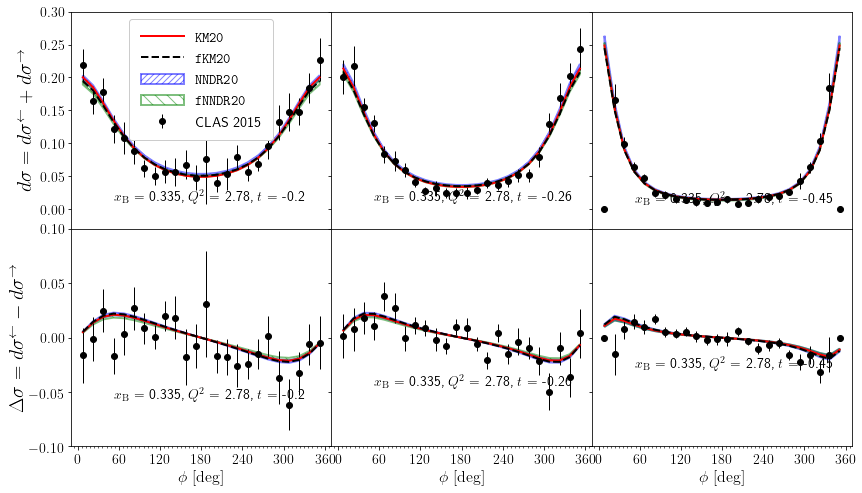

In [31]:
%%time
fig = plots.CLAS15phi(lines=[th20,thf20], bands=[thNNDR20, thfNNDR20])

CPU times: user 36min 18s, sys: 4.2 s, total: 36min 22s
Wall time: 36min 9s


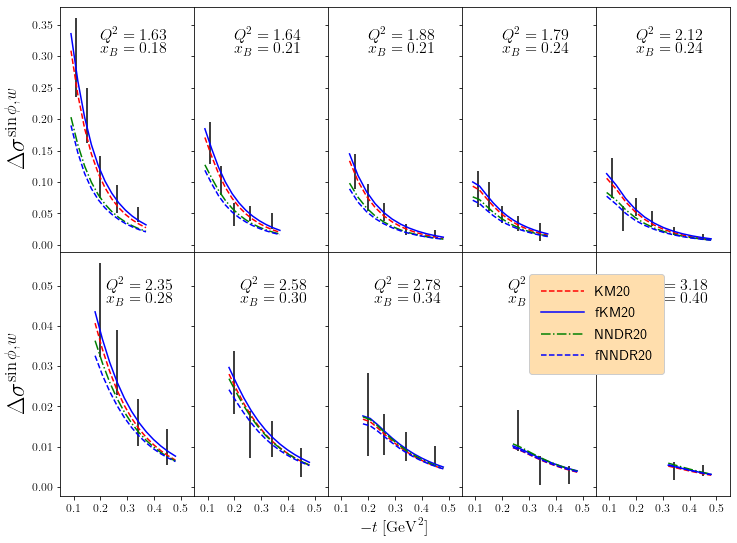

In [32]:
%%time
fig = plots.CLAS15xs(lines=[th20,thf20,thNNDR20, thfNNDR20])

CPU times: user 44min 12s, sys: 4.96 s, total: 44min 16s
Wall time: 44min 5s


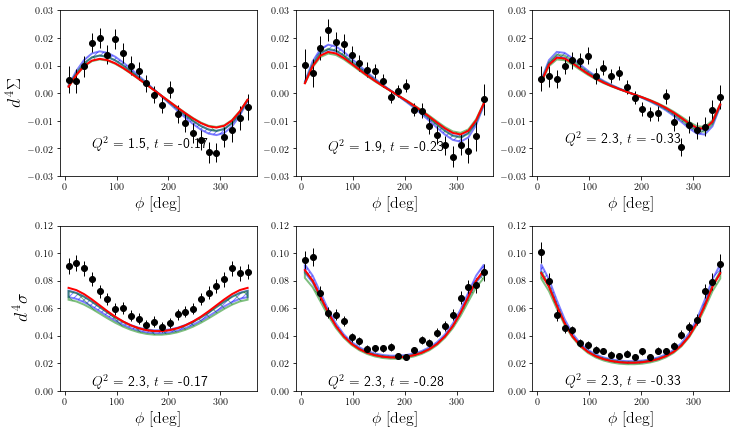

In [33]:
%%time
fig = plots.HallAphi(lines=[th20], bands=[thNNDR20,thfNNDR20])

CPU times: user 44min 25s, sys: 5.58 s, total: 44min 31s
Wall time: 43min 55s


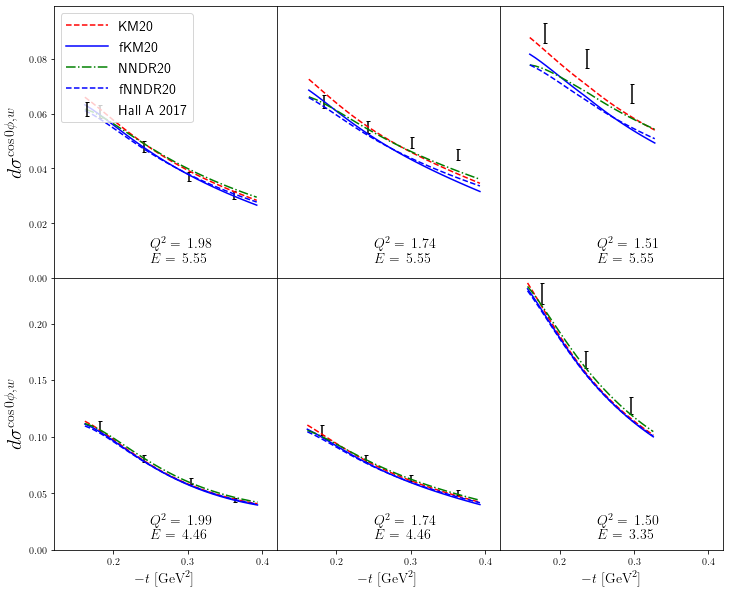

In [34]:
%%time
fig = plots.HallA17(obs='BSScos0', lines=[th20,thf20,thNNDR20, thfNNDR20])

CPU times: user 43min 56s, sys: 9.75 s, total: 44min 5s
Wall time: 43min 22s


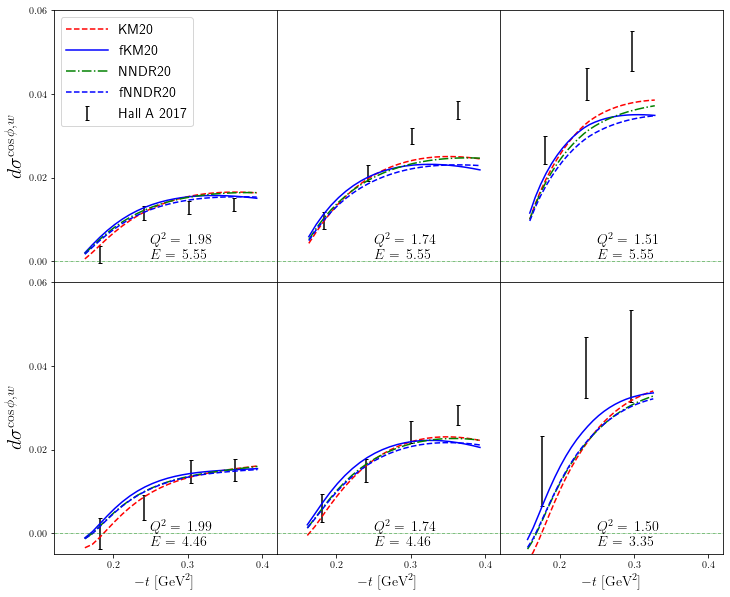

In [35]:
%%time
fig = plots.HallA17(obs='BSScos1', lines=[th20,thf20,thNNDR20, thfNNDR20])

CPU times: user 36min 41s, sys: 3.82 s, total: 36min 45s
Wall time: 36min 13s


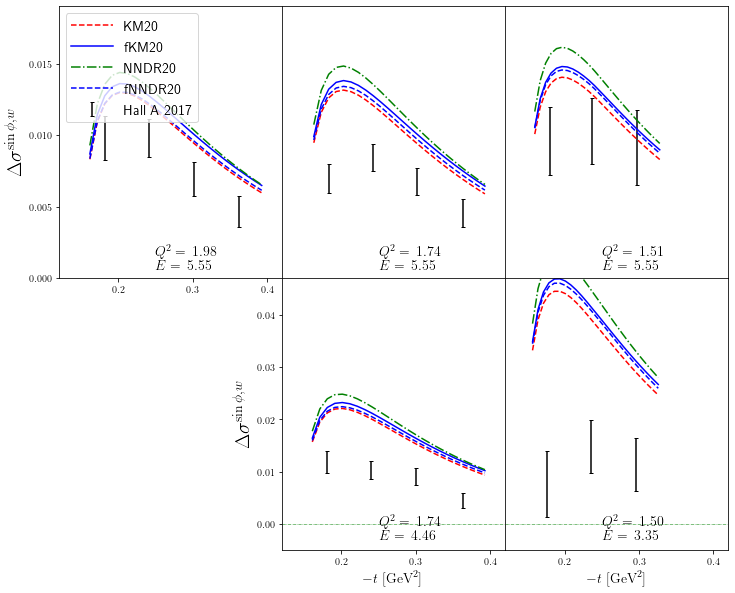

In [36]:
%%time
fig = plots.HallA17(obs='BSDsin1', lines=[th20,thf20,thNNDR20, thfNNDR20])

CPU times: user 7.65 s, sys: 69.7 ms, total: 7.72 s
Wall time: 1.41 s


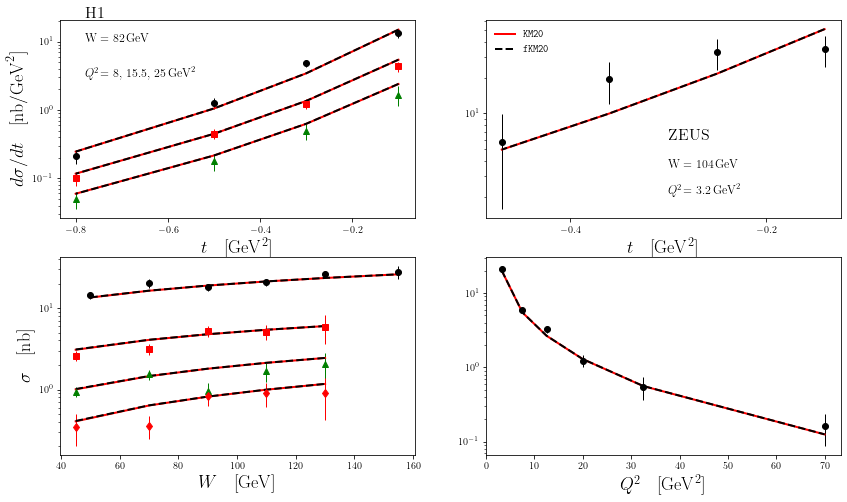

In [37]:
%%time
fig = plots.H1ZEUS(lines=[th20, thf20])

# Plots for paper

## Comparison to pDVCS and nDVCS data

In [39]:
nXSlo = utils.select(data[138], ['in1energy < 5.'])
nXShi = utils.select(data[138], ['in1energy > 5.'])
nBSS1lo = utils.select(data[140], ['FTn == 1', 'in1energy < 5.'])
nBSS1hi = utils.select(data[140], ['FTn == 1', 'in1energy > 5.'])
pXSlo = utils.select(data[141], ['Q2 < 1.8', 'Q2 > 1.6', 'in1energy < 5.'])
pXShi = utils.select(data[141], ['Q2 < 1.8', 'Q2 > 1.6', 'in1energy > 5.'])
pBSS1lo = utils.select(data[136], ['FTn == 1', 'Q2 < 1.8', 'Q2 > 1.6', 'in1energy < 5.'])
pBSS1hi = utils.select(data[136], ['FTn == 1', 'Q2 < 1.8', 'Q2 > 1.6', 'in1energy > 5.'])

In [40]:
%%time
THNN = thfNNDR20
NNplo = [THNN.predict(pt, error=True) for pt in pXSlo]
NNnlo = [THNN.predict(pt, error=True) for pt in nXSlo]
NNphi = [THNN.predict(pt, error=True) for pt in pXShi]
NNnhi = [THNN.predict(pt, error=True) for pt in nXShi]

CPU times: user 6min 54s, sys: 589 ms, total: 6min 55s
Wall time: 6min 55s


In [41]:
%%time
THNN = thfNNDR20
NNplo1 = [THNN.predict(pt, error=True) for pt in pBSS1lo]
NNnlo1 = [THNN.predict(pt, error=True) for pt in nBSS1lo]
NNphi1 = [THNN.predict(pt, error=True) for pt in pBSS1hi]
NNnhi1 = [THNN.predict(pt, error=True) for pt in nBSS1hi]

CPU times: user 3min 32s, sys: 383 ms, total: 3min 33s
Wall time: 3min 33s


In [42]:
NNpredsp = [NNplo, NNphi, NNplo1, NNphi1]
NNpredsn = [NNnlo, NNnhi, NNnlo1, NNnhi1]

In [43]:
pBSS1hi.df().Q2.values

array([1.74, 1.74, 1.74, 1.75])

CPU times: user 7.68 s, sys: 13.4 ms, total: 7.69 s
Wall time: 869 ms


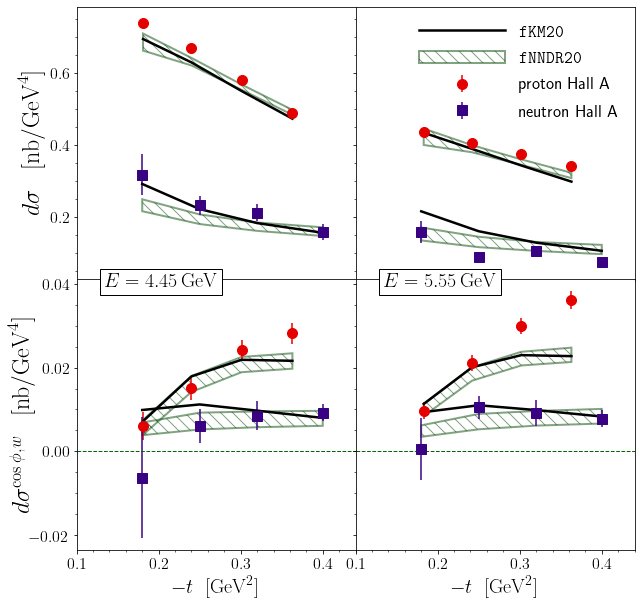

In [44]:
%%time
TH = thf20
TH2 = th15

nmarker_style = dict(color='xkcd:indigo', marker='s', linestyle='None',
                markersize=10, markerfacecoloralt='white', fillstyle='full')
pmarker_style = dict(color='xkcd:red', marker='o', linestyle='None',
                markersize=10, markerfacecoloralt='white', fillstyle='full')

ppts = [pXSlo, pXShi, pBSS1lo, pBSS1hi]
npts = [nXSlo, nXShi, nBSS1lo, nBSS1hi]

fig, axs = plt.subplots(2, 2, figsize=[10,10], sharex=True, sharey='row')
for pn, ax in enumerate(axs.flatten()):
    
    pts = ppts[pn]
    NNpred = NNpredsp[pn]
    up, down = np.array([(m+err, m-err) for m,err in NNpred]).transpose()
    xvals = pts.df().tm.values
    x = np.concatenate( (xvals, xvals[::-1]) )
    y = np.concatenate( (up, down[::-1]) )
    ax.fill(x, y, alpha=0.5, hatch = '\\\\', facecolor='none', edgecolor='xkcd:darkgreen', 
                    linewidth=2, label=r'\texttt{{{}}}'.format(THNN.name))
    ax.errorbar(pts.df().tm.values, pts.df().val.values, pts.df().err.values, 
                **pmarker_style, label='proton Hall A')
    ax.plot(pts.df().tm.values, [TH.predict(pt) for pt in pts], 'k-', lw=2.5, 
            label=r'\texttt{{{}}}'.format(TH.name))
    # if pn < 2:
        # ax.plot(pts.df().tm.values, [TH2.predict(pt) for pt in pts], 'k:', lw=3, label=TH2.name)

    pts = npts[pn]
    NNpred = NNpredsn[pn]
    up, down = np.array([(m+err, m-err) for m,err in NNpred]).transpose()
    xvals = pts.df().tm.values
    x = np.concatenate( (xvals, xvals[::-1]) )
    y = np.concatenate( (up, down[::-1]) )
    ax.fill(x, y, alpha=0.5, hatch = '\\\\', facecolor='none', edgecolor='xkcd:darkgreen', 
                    linewidth=2)
    ax.errorbar(pts.df().tm.values, pts.df().val.values, pts.df().err.values, 
                **nmarker_style, label='neutron Hall A')
    ax.plot(pts.df().tm.values, [TH.predict(pt) for pt in pts], 'k-', lw=2.5)
    # if pn < 2:
        # ax.plot(pts.df().tm.values, [TH2.predict(pt) for pt in pts], 'k:', lw=3)
        
    #ax.set_ylim(-0.03,0.12)
    ax.set_xlim(0.1,0.44)
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))  # tickmarks
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.02))
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(16)

    if pn >= 2:
        ax.set_xlabel(r"$-t \;\; [\mathrm{GeV}^2]$", fontsize=20)
        ax.axhline(y=0, color="darkgreen", linestyle="--", linewidth=1)
        t = ax.text(0.1, 0.97, r'$E = {}\, \mathrm{{GeV}}$'.format(pts[0].in1energy), 
                    transform=ax.transAxes, fontsize=20)
        t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
        
    if pn == 0:
        ax.set_ylabel(r"$d\sigma\;\;\;  [\mathrm{{nb/GeV}}^4]$", fontsize=24, labelpad=5)
        ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.2))  # tickmarks
        ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.05))
        
    elif pn ==2:
        ax.set_ylabel(r"{}".format(
        OBStoTeX[('BSSw', 1)]) + r"$\;\;\;  [\mathrm{{nb/GeV}}^4]$", fontsize=24, labelpad=-6)
        ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.02))  # tickmarks
        ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.005))
    elif pn == 1:
        ax.legend(loc=1, handlelength=5,
                 fancybox=True, framealpha=1.,
                prop=matplotlib.font_manager.FontProperties(size="xx-large")
            ).draw_frame(0)
    

plt.subplots_adjust(hspace=0, wspace=0)

In [45]:
fig.savefig('{}pnHallA.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

## Non-flavored  non-DR vs DR

CPU times: user 23.7 s, sys: 722 ms, total: 24.4 s
Wall time: 36.5 s


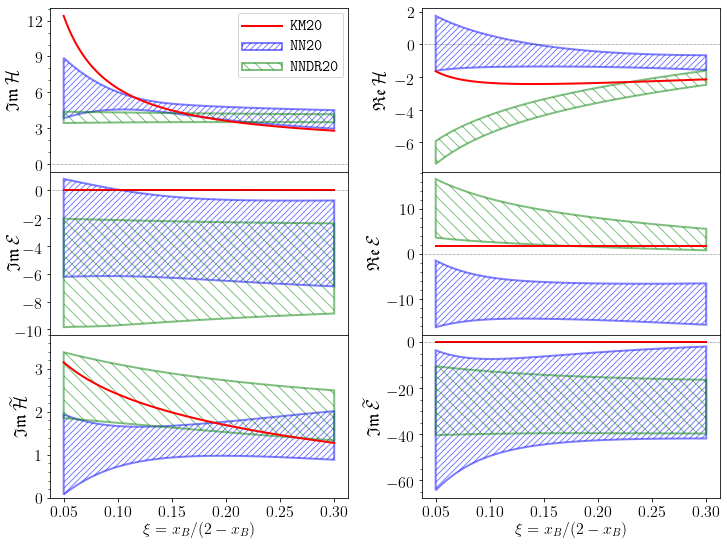

In [46]:
%%time
fig = plots.CFF3(cffs=['ImH', 'ReH', 'ImE', 'ReE', 'ImHt', 'ImEt'],
                 lines=[th20], bands=[thNN20, thNNDR20])

In [47]:
fig.savefig('{}nfDR.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

One might wonder if it is OK that totally unbiased NN20 is for, e.g. ReE, disjunct from (also OK solutions of!) NNDR20. Thing is, the uncertainty bands above statistically contain only 68% of solutions. Total sets of solutions for the two models actually overlap:

In [48]:
pt0 = data[101][0]  # some random kinematic point

In [49]:
arNNDR = thNNDR20.m.ReE(pt0).flatten(); arNNDR.sort(); arNNDR[::-1]  # values of ReE at pt0 for each net

array([27.19035691, 24.35294519, 21.89057754, 13.74126077, 13.14865725,
       11.08827319,  9.22513764,  8.4014705 ,  7.52822247,  6.20625759,
        5.24750643,  5.11162506,  4.97975959,  3.6367524 ,  3.24094531,
        2.72318851,  2.3559445 ,  2.34069516,  2.15049944, -0.82578301])

In [50]:
arNN = thNN20.m.ReE(pt0).flatten(); arNN.sort(); arNN[::-1]

array([  2.51844368,  -2.41983256,  -4.98704161,  -6.42799372,
        -7.00747744,  -7.84543299,  -8.81692307,  -8.83909719,
       -10.52678798, -10.53712229, -11.33174472, -11.64334025,
       -11.66630557, -11.78200528, -11.88396156, -12.58803603,
       -14.01046695, -15.20149409, -20.57743949, -23.36285199])

## Flavor-separated CFFs $H_u$/$H_d$

CPU times: user 50.8 s, sys: 99.3 ms, total: 50.9 s
Wall time: 33.5 s


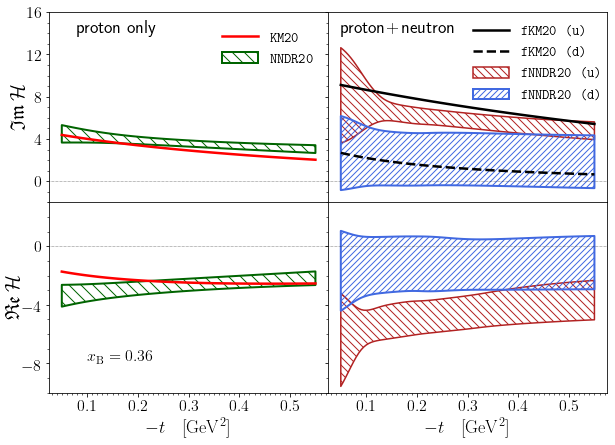

In [51]:
%%time
NPTS = 100
ex_pt = data[136][0].copy()
ex_pt.xB = 0.36
ex_pt.Q2 = 4.
NN2 = False

THnf = th20
THf = thf20
THNNnf = thNNDR20
THNNf = thfNNDR20


plt.close('all')
RASTER = True
rorder = -3000
if RASTER:
    rorder = 1

fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize=[10,7])
axs = axs.reshape(4)
cffs = ['ImH', 'ImH', 'ReH', 'ReH']
ylims = {
        'ImH': (-2, 16), 'ReH': (-10, 3),
         'ImHu': (-2, 16), 'ReHu': (-10, 3),
         'ImHd': (-2, 16), 'ReHd': (-10, 3),
         'ImE': (-40, 35), 'ReE': (-40, 10),
         'ImEt': (-200, 300), 'ReEt': (-150, 150),
         'ImHt': (-6, 10), 'ReHt': (-12, 12)}
for (pn, ax) in enumerate(axs):
    if pn % 2:
        # right panels - flavor decomposition
        NN2 = True  # second NN is for d-quark
        cff = cffs[pn]+'u'
        cff2 = cffs[pn]+'d'
        TH = THf
        THNN = THNNf
    else:
        # left panels - non-flavored CFFs
        NN2 = False
        cff = cffs[pn]
        TH  = THnf
        THNN = THNNnf
        
    ax.set_rasterization_zorder(rorder)
    tms = np.linspace(0.05, 0.55, NPTS)
    
    ys = []
    y2s = []
    ysNN = []
    ysNNerr = []
    ysNN2 = []
    ysNN2err = []

    for tm in tms:
        pt = ex_pt.copy()
        pt.tm = tm
        del pt.W
        del pt.xi
        del pt.t
        utils.fill_kinematics(pt)
        
        if 'g' in TH.m.__dict__:
            TH.m.g.newcall = 1
        if pn == 1:
            y = getattr(TH.m.DR, cffs[pn])(pt,f='u')
            y2 = getattr(TH.m.DR, cffs[pn])(pt,f='d')
        elif pn == 3:
            y = 0  # FIXME implement flavored ReH!
            y2 = 0
        elif not (pn % 2):
            y = getattr(TH.m, cff)(pt)
        ys.append(y)
        
        yall = getattr(THNN.m, cff)(pt)
        ysNN.append(yall.mean())
        ysNNerr.append(yall.std())
        
        if NN2:
            y2s.append(y2)
            yall = getattr(THNN.m, cff2)(pt)
            ysNN2.append(yall.mean())
            ysNN2err.append(yall.std())
            
    ysNN = np.array(ysNN)
    ysNNerr = np.array(ysNNerr)
    

    if NN2:
        ysNN2 = np.array(ysNN2)
        ysNN2err = np.array(ysNN2err)
    
    
    if pn==1:
        ax.plot(tms, ys, 'k-', lw=2.5, label=r'\texttt{{{} (u)}}'.format(TH.name))
        ax.plot(tms, y2s, 'k--', lw=2.5, label=r'\texttt{{{} (d)}}'.format(TH.name))
    elif not (pn % 2):
        ax.plot(tms, ys, 'r-', lw=2.5, label=r'\texttt{{{}}}'.format(TH.name))
    

    if not pn % 2:
        ax.fill_between(tms, ysNN-ysNNerr, ysNN+ysNNerr,
                    label=r'\texttt{{{}}}'.format(THNN.name), 
                    #color = 'darkgreen', alpha = 0.5,
                    hatch = '\\\\', facecolor='none', edgecolor='darkgreen', 
                    linewidth=2, zorder=0)
    else:
        ax.fill_between(tms, ysNN-ysNNerr, ysNN+ysNNerr,
                    label=r'\texttt{{{} (u)}}'.format(THNN.name), 
                    #color = 'firebrick', alpha = 0.6,
                    hatch = '\\\\\\', facecolor='none', edgecolor='firebrick', 
                    linewidth=1.5, zorder=0)
    if NN2:
        ax.fill_between(tms, ysNN2-ysNN2err, ysNN2+ysNN2err, #alpha=0.3,
                    label=r'\texttt{{{} (d)}}'.format(THNN.name),
                    #color = 'royalblue', alpha = 0.6,
                    hatch = '////', facecolor='none', edgecolor='royalblue',
                    linewidth=2, zorder=0)
        #ax.fill_between(xis, ysNN2-ysNN2err, ysNN2+ysNN2err, #alpha=0.3,
                    #label=r'{}'.format(THNN2.name),
                    #color = 'royalblue', alpha = 0.6,
                    #hatch = '....', edgecolor='royalblue', facecolor='none',
                    #linewidth=1.5, zorder=1)
    

        
    # ax.set_xlim(0.03, 0.52)
    ax.xaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(0.1)) 
    ax.xaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(0.01)) 
    ax.yaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(4.)) 
    ax.yaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(1.)) 
    
    if not pn % 2:
        ax.set_ylabel(toTeX[cff], fontsize=20, labelpad=-3)
    ax.set_ylim(*ylims[cff])
    ax.axhline(y=0, linewidth=0.5, color='k', linestyle=':')  # y=0 thin line
    if pn >= 2:
        ax.set_xlabel(r'$-t\quad [\mathrm{GeV}^2]$', fontsize=18)
    if pn == 0:
        ax.text(0.08, 14, 'proton only', fontsize=18)
        #axs[pn].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.01))
    if pn == 0:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=(0.6, 0.69),
                  handlelength=2.5,
            prop=matplotlib.font_manager.FontProperties(size="x-large")
        ).draw_frame(0)
    if pn == 1:
        ax.text(0.05, 14, 'proton\hspace*{-0.3em} +\hspace*{-0.2em} neutron', fontsize=18)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=(0.5, 0.5),
                  handlelength=2.5,
            prop=matplotlib.font_manager.FontProperties(size="x-large")
        ).draw_frame(0)
    if pn == 2:
        s1 = r'$x_{{\mathrm{{B}}}} = {:.2f}$'.format(ex_pt.xB)
        ax.text(0.1, -8, s1, fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
#plt.tight_layout(h_pad=0.) 
plt.subplots_adjust(hspace=0, wspace=0)

In [52]:
fig.savefig('{}fCFFH.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0)

## Failed flavor-separation of CFFs $E_u$/$E_d$

Trying the same for CFF E doesn't work, as expected, so it is a kind of consistency check:

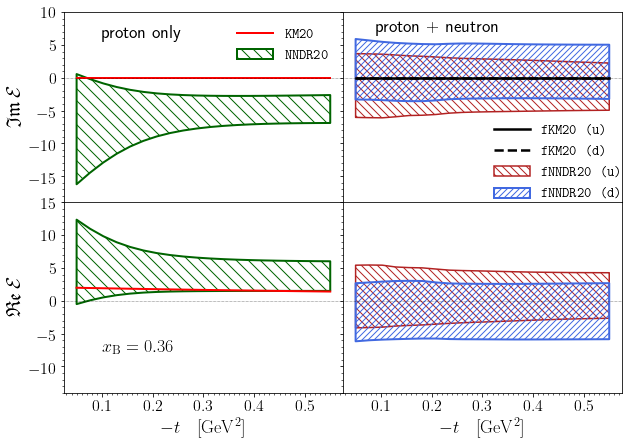

In [53]:
NPTS = 20
ex_pt = data[136][0].copy()
ex_pt.xB = 0.36
ex_pt.Q2 = 4.
NN2 = False

THnf = th20
THf = thf20
THNNnf = thNNDR20
THNNf = thfNNDR20


plt.close('all')
RASTER = True
rorder = -3000
if RASTER:
    rorder = 1

fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize=[10,7])
axs = axs.reshape(4)
cffs = ['ImE', 'ImE', 'ReE', 'ReE']
ylims = {
        'ImH': (-2, 13), 'ReH': (-10, 3),
         'ImHu': (-2, 13), 'ReHu': (-10, 3),
         'ImHd': (-2, 13), 'ReHd': (-10, 3),
         'ImE': (-40, 35), 'ReE': (-40, 10),
        'ImEu': (-19, 10), 'ReEu': (-14, 15),
         'ImEd': (-19, 10), 'ReEd': (-14, 14),
         'ImEt': (-200, 300), 'ReEt': (-150, 150),
         'ImHt': (-6, 10), 'ReHt': (-12, 12)}
for (pn, ax) in enumerate(axs):
    if pn % 2:
        # right panels - flavor decomposition
        NN2 = True  # second NN is for d-quark
        cff = cffs[pn]+'u'
        cff2 = cffs[pn]+'d'
        TH = THf
        THNN = THNNf
    else:
        # left panels - non-flavored CFFs
        NN2 = False
        cff = cffs[pn]
        TH  = THnf
        THNN = THNNnf
        
    ax.set_rasterization_zorder(rorder)
    tms = np.linspace(0.05, 0.55, NPTS)
    
    ys = []
    y2s = []
    ysNN = []
    ysNNerr = []
    ysNN2 = []
    ysNN2err = []

    for tm in tms:
        pt = ex_pt.copy()
        pt.tm = tm
        del pt.W
        del pt.xi
        del pt.t
        utils.fill_kinematics(pt)
        
        if 'g' in TH.m.__dict__:
            TH.m.g.newcall = 1
        if pn == 1:
            y = getattr(TH.m.DR, cffs[pn])(pt,f='u')
            y2 = getattr(TH.m.DR, cffs[pn])(pt,f='d')
        elif pn == 3:
            y = 0  # FIXME implement flavored ReH!
            y2 = 0
        elif not (pn % 2):
            y = getattr(TH.m, cff)(pt)
        ys.append(y)
        
        yall = getattr(THNN.m, cff)(pt)
        ysNN.append(yall.mean())
        ysNNerr.append(yall.std())
        
        if NN2:
            y2s.append(y2)
            yall = getattr(THNN.m, cff2)(pt)
            ysNN2.append(yall.mean())
            ysNN2err.append(yall.std())
            
    ysNN = np.array(ysNN)
    ysNNerr = np.array(ysNNerr)
    

    if NN2:
        ysNN2 = np.array(ysNN2)
        ysNN2err = np.array(ysNN2err)
    
    
    if pn==1:
        ax.plot(tms, ys, 'k-', lw=2.5, label=r'\texttt{{{} (u)}}'.format(TH.name))
        ax.plot(tms, y2s, 'k--', lw=2.5, label=r'\texttt{{{} (d)}}'.format(TH.name))
    elif not (pn % 2):
        ax.plot(tms, ys, 'r-',  lw=2, label=r'\texttt{{{}}}'.format(TH.name))
    

    if not pn % 2:
        ax.fill_between(tms, ysNN-ysNNerr, ysNN+ysNNerr,
                    label=r'\texttt{{{}}}'.format(THNN.name), 
                    #color = 'darkgreen', alpha = 0.5,
                    hatch = '\\\\', facecolor='none', edgecolor='darkgreen', 
                    linewidth=2, zorder=0)
    else:
        ax.fill_between(tms, ysNN-ysNNerr, ysNN+ysNNerr,
                    label=r'\texttt{{{} (u)}}'.format(THNN.name), 
                    #color = 'firebrick', alpha = 0.6,
                    hatch = '\\\\\\', facecolor='none', edgecolor='firebrick', 
                    linewidth=1.5, zorder=0)
    if NN2:
        ax.fill_between(tms, ysNN2-ysNN2err, ysNN2+ysNN2err, #alpha=0.3,
                    label=r'\texttt{{{} (d)}}'.format(THNN.name),
                    #color = 'royalblue', alpha = 0.6,
                    hatch = '////', facecolor='none', edgecolor='royalblue',
                    linewidth=2, zorder=0)
        #ax.fill_between(xis, ysNN2-ysNN2err, ysNN2+ysNN2err, #alpha=0.3,
                    #label=r'{}'.format(THNN2.name),
                    #color = 'royalblue', alpha = 0.6,
                    #hatch = '....', edgecolor='royalblue', facecolor='none',
                    #linewidth=1.5, zorder=1)
    

        
    # ax.set_xlim(0.03, 0.52)
    ax.xaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(0.1)) 
    ax.xaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(0.01)) 
    ax.yaxis.set_major_locator(
            matplotlib.ticker.MultipleLocator(5.)) 
    ax.yaxis.set_minor_locator(
            matplotlib.ticker.MultipleLocator(1.)) 
    
    if not pn % 2:
        ax.set_ylabel(toTeX[cff], fontsize=20)
    ax.set_ylim(*ylims[cff])
    ax.axhline(y=0, linewidth=0.5, color='k', linestyle=':')  # y=0 thin line
    if pn >= 2:
        ax.set_xlabel(r'$-t\quad [\mathrm{GeV}^2]$', fontsize=18)
    if pn == 0:
        ax.text(0.1, 6, r'$\text{proton only}$', fontsize=18)
        #axs[pn].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.01))
    if pn == 0:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=(0.6, 0.71),
                  handlelength=2.5,
            prop=matplotlib.font_manager.FontProperties(size="x-large")
        ).draw_frame(0)
    if pn == 1:
        ax.text(0.09, 7, r'$\text{proton + neutron}$', fontsize=18)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc=(0.52, -0.02),
                  handlelength=2.5,
            prop=matplotlib.font_manager.FontProperties(size="x-large")
        ).draw_frame(0)
    if pn == 2:
        s1 = r'$x_{{\mathrm{{B}}}} = {:.2f}$'.format(ex_pt.xB)
        ax.text(0.1, -8, s1, fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
#plt.tight_layout(h_pad=0.) 
plt.subplots_adjust(hspace=0, wspace=0)

In [54]:
fig.savefig('{}fCFFE.pdf'.format(PAPER_DIR), bbox_inches='tight', transparent=True, pad_inches=0.2)

# Checking dispersion relations

Although dispersion relations should be satisfied by construction, the required code is quite involved in the neural net framework. So, to be sure, we check these relations by calculating the subtraction constant from imaginary and real parts of CFFs and checking that it doesn't depend on $\xi$

Calculation od subtraction constant for H_u

In [55]:
def ImHu(xB, t):
    pt = Data.DummyPoint({'xB':xB, 't':t, 'Q2':4.0})
    utils.fill_kinematics(pt)
    return thfNNDR20.m.ImHu(pt)

In [56]:
def imhu(x):
    return ImHu(2*x/(1+x), 0)

In [57]:
def fimhu(x):
   if isinstance(x, np.ndarray):
      res = []
      for item in x:
         res.append(imhu(x))
   else:
      res = imhu(x)
   return res

In [58]:
def ReHu(xB, t):
    pt = Data.DummyPoint({'xB':xB, 't':t, 'Q2':4.0})
    utils.fill_kinematics(pt)
    return thfNNDR20.m.ReHu(pt)

In [59]:
def rehu(x):
    return ReHu(2*x/(1+x), 0)

In [60]:
a = list(range(20))
b = list(np.linspace(0.05, 0.3,10))

In [62]:
%%time
pvhu = [[scipy.integrate.quad(lambda x: 1/np.pi*((-2*x/(xi+x))*fimhu(x)[i]), 0.0000000001, 1, weight = 'cauchy', wvar = xi)  for xi in b] for i in a]

CPU times: user 2min 58s, sys: 173 ms, total: 2min 58s
Wall time: 2min 58s


In [63]:
chu = []
for k in range(len(pvhu)):
    chu.append([rehu(xi)[k] - i[0] for xi, i in zip(b, pvhu[k])])

Text(0.5, 0, '$\\xi$')

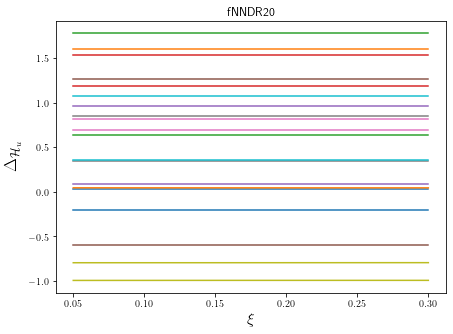

In [64]:
fig, ax = plt.subplots()
for i in range(20):
    ax.plot(b,chu[i])
plt.title('fNNDR20')
plt.ylabel('$\Delta_{\mathcal{H}_u}$', fontsize=18)
plt.xlabel(r'$\xi$', fontsize=16)   

Calculation of subtraction constant for E_u

In [65]:
def ImEu(xB, t):
    pt = Data.DummyPoint({'xB':xB, 't':t, 'Q2':4.0})
    utils.fill_kinematics(pt)
    return thfNNDR20.m.ImEu(pt)

In [66]:
def imeu(x):
    return ImEu(2*x/(1+x), 0)

In [67]:
def fimeu(x):
   if isinstance(x, np.ndarray):
      res = []
      for item in x:
         res.append(imeu(x))
   else:
      res = imeu(x)
   return res

In [68]:
def ReEu(xB, t):
    pt = Data.DummyPoint({'xB':xB, 't':t, 'Q2':4.0})
    utils.fill_kinematics(pt)
    return thfNNDR20.m.ReEu(pt)

In [69]:
def reeu(x):
    return ReEu(2*x/(1+x), 0)

In [70]:
%%time
pveu = [[scipy.integrate.quad(lambda x: 1/np.pi*((-2*x/(xi+x))*fimeu(x)[i]), 0.0000000001, 1, weight = 'cauchy', wvar = xi)  for xi in b] for i in a]

CPU times: user 2min 54s, sys: 99.7 ms, total: 2min 54s
Wall time: 2min 54s


In [71]:
ceu = []
for k in range(len(pveu)):
    ceu.append([reeu(xi)[k] - i[0] for xi, i in zip(b, pveu[k])])

Text(0.5, 0, '$\\xi$')

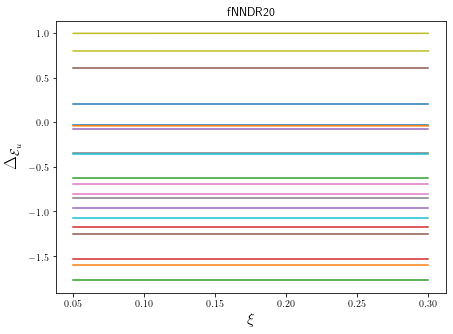

In [72]:
fig, ax = plt.subplots()
for i in range(20):
    ax.plot(b,ceu[i])
plt.title('fNNDR20')
plt.ylabel('$\Delta_{\mathcal{E}_u}$', fontsize=18)
plt.xlabel(r'$\xi$', fontsize=16)    

So everything is fine.